# Loading dependents
***

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading files
***

In [2]:
death_data = 'NCHS_LeadingCauses.csv'
chronic_ind_data = 'U.S._Chronic_Disease_Indicators.csv'

In [3]:
death_data_df = pd.read_csv(death_data, encoding = 'ISO-8859-1')
chronic_ind_data_df = pd.read_csv(chronic_ind_data, encoding = 'ISO-8859-1')

/Users/jeffmoore/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Starting analysis on the chronic indicators file
# Note the number of records
chronic_ind_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406480 entries, 0 to 406479
Data columns (total 34 columns):
YearStart                    406480 non-null int64
YearEnd                      406480 non-null int64
LocationAbbr                 406480 non-null object
LocationDesc                 406480 non-null object
DataSource                   406480 non-null object
Topic                        406480 non-null object
Question                     406480 non-null object
Response                     79323 non-null object
DataValueUnit                375783 non-null object
DataValueType                406480 non-null object
DataValue                    300289 non-null object
DataValueAlt                 276138 non-null float64
DataValueFootnoteSymbol      188067 non-null object
DatavalueFootnote            187901 non-null object
LowConfidenceLimit           248467 non-null float64
HighConfidenceLimit          248467 non-null float64
StratificationCategory1      406480 non-null object
Strat

In [5]:
# Notice the drop in the number of records
chronic_ind_data_df[chronic_ind_data_df['YearEnd'] == 2015].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64046 entries, 0 to 207600
Data columns (total 34 columns):
YearStart                    64046 non-null int64
YearEnd                      64046 non-null int64
LocationAbbr                 64046 non-null object
LocationDesc                 64046 non-null object
DataSource                   64046 non-null object
Topic                        64046 non-null object
Question                     64046 non-null object
Response                     0 non-null object
DataValueUnit                63672 non-null object
DataValueType                64046 non-null object
DataValue                    42214 non-null object
DataValueAlt                 41902 non-null float64
DataValueFootnoteSymbol      22278 non-null object
DatavalueFootnote            22278 non-null object
LowConfidenceLimit           41585 non-null float64
HighConfidenceLimit          41585 non-null float64
StratificationCategory1      64046 non-null object
Stratification1           

In [65]:
# Need the 2015 only data
chronic_ind_data_df = chronic_ind_data_df[chronic_ind_data_df['YearEnd'] == 2015]

In [66]:
#chronic_ind_data_df.head()

In [57]:
chronic_ind_data_df['Topic'].value_counts()

Diabetes                                           10765
Nutrition, Physical Activity, and Weight Status     7974
Cardiovascular Disease                              7285
Chronic Obstructive Pulmonary Disease               6960
Arthritis                                           6960
Tobacco                                             4994
Asthma                                              4675
Alcohol                                             4441
Overarching Conditions                              4183
Cancer                                              2494
Mental Health                                       1195
Immunization                                         870
Chronic Kidney Disease                               870
Reproductive Health                                  325
Oral Health                                           55
Name: Topic, dtype: int64

In [58]:
counts_ind = chronic_ind_data_df['Topic'].value_counts()

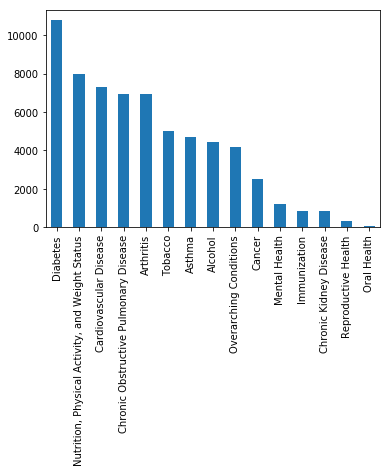

In [59]:
counts_ind.plot(kind='bar')
plt.show()

# Analysis on Three Indicators (Diabeties, Heart, Nutrition)
***

In [62]:
chronic_dia_ind_df = chronic_ind_data_df[chronic_ind_data_df['Topic'].str.contains('Dia')]
chronic_dia_ind_df['Question'].value_counts()

Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes    870
Prevalence of high blood pressure among adults aged >= 18 years with diagnosed diabetes                870
Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes       870
Foot examination among adults aged >= 18 years with diagnosed diabetes                                 870
Prevalence of high cholesterol among adults aged >= 18 years with diagnosed diabetes                   870
Influenza vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes       870
Dilated eye examination among adults aged >= 18 years with diagnosed diabetes                          870
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes    870
Prevalence of depressive disorders among adults aged >= 18 years with diagnosed diabetes               870
Prevalence of diagnosed diabetes amon

In [72]:
chronic_gb_dia_ind_df = chronic_dia_ind_df.groupby(by=['YearEnd', 'LocationDesc', 'Question']).sum()
chronic_gb_dia_ind_df

YearStart  \
YearEnd LocationDesc  Question                                                        
2015    Alabama       Adults with diagnosed diabetes aged >= 18 years...      32240   
                      Diabetes prevalence among women aged 18-44 years        12090   
                      Dilated eye examination among adults aged >= 18...      32240   
                      Foot examination among adults aged >= 18 years ...      32240   
                      Glycosylated hemoglobin measurement among adult...      32240   
                      Influenza vaccination among noninstitutionalize...      32240   
                      Influenza vaccination among noninstitutionalize...      32240   
                      Pneumococcal vaccination among noninstitutional...      32240   
                      Pneumococcal vaccination among noninstitutional...      32240   
                      Prevalence of depressive disorders among adults...      32240   
                      Prevalence of diagnosed diabetes among adults a...      32240   
                      Prevalence of high blood pressure among adults ...      32240   
                      Prevalence of high cholesterol among adults age...      32240   
        Alaska        Adults with diagnosed diabetes aged >= 18 years...      32240   
                      Diabetes prevalence among women aged 18-44 years        12090   
                      Dilated eye examination among adults aged >= 18...      32240   
                      Foot examination among adults aged >= 18 years ...      32240   
                      Glycosylated hemoglobin measurement among adult...      32240   
                      Influenza vaccination among noninstitutionalize...      32240   
                      Influenza vaccination among noninstitutionalize...      32240   
                      Pneumococcal vaccination among noninstitutional...      32240   
                      Pneumococcal vaccination among noninstitutional...      32240   
                      Prevalence of depressive disorders among adults...      32240   
                      Prevalence of diagnosed diabetes among adults a...      32240   
                      Prevalence of high blood pressure among adults ...      32240   
                      Prevalence of high cholesterol among adults age...      32240   
        Arizona       Adults with diagnosed diabetes aged >= 18 years...      32240   
                      Diabetes prevalence among women aged 18-44 years        12090   
                      Dilated eye examination among adults aged >= 18...      32240   
                      Foot examination among adults aged >= 18 years ...      32240   
...                                                                             ...   
        West Virginia Prevalence of depressive disorders among adults...      32240   
                      Prevalence of diagnosed diabetes among adults a...      32240   
                      Prevalence of high blood pressure among adults ...      32240   
                      Prevalence of high cholesterol among adults age...      32240   
        Wisconsin     Adults with diagnosed diabetes aged >= 18 years...      32240   
                      Diabetes prevalence among women aged 18-44 years        12090   
                      Dilated eye examination among adults aged >= 18...      32240   
                      Foot examination among adults aged >= 18 years ...      32240   
                      Glycosylated hemoglobin measurement among adult...      32240   
                      Influenza vaccination among noninstitutionalize...      32240   
                      Influenza vaccination among noninstitutionalize...      32240   
                      Pneumococcal vaccination among noninstitutional...      32240   
                      Pneumococcal vaccination among noninstitutional...      32240   
                      Prevalence of depressive disorders among adults...

In [63]:
chronic_heart_ind_df = chronic_ind_data_df[chronic_ind_data_df['Topic'].str.contains('Cardio')]
chronic_heart_ind_df['Question'].value_counts()

High cholesterol prevalence among adults aged >= 18 years                                                                      870
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease           870
Taking medicine for high blood pressure control among adults aged >= 18 years with high blood pressure                         870
Cholesterol screening among adults aged >= 18 years                                                                            870
Influenza vaccination among noninstitutionalized adults aged >= 65 years with a history of coronary heart disease or stroke    870
Awareness of high blood pressure among adults aged >= 18 years                                                                 870
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with a history of coronary heart disease           870
Influenza vaccination among noninstitutionalized adults aged 18-64 years with a his

In [64]:
chronic_nutri_ind_df = chronic_ind_data_df[chronic_ind_data_df['Topic'].str.contains('Nutr')]
chronic_nutri_ind_df['Question'].value_counts()

Meeting aerobic physical activity guidelines for substantial health benefits and for muscle-strengthening activity among adults aged >= 18 years    870
No leisure-time physical activity among adults aged >= 18 years                                                                                     870
Meeting aerobic physical activity guidelines for additional and more extensive health benefits among adults aged >= 18 years                        870
Healthy weight among adults aged >= 18 years                                                                                                        870
Obesity among adults aged >= 18 years                                                                                                               870
Overweight or obesity among adults aged >= 18 years                                                                                                 870
Meeting aerobic physical activity guidelines for substantial health benefits among adult

In [67]:
# The only remaining to-dos are to plot chronics ind per state data

In [68]:
# Looked at pulmonary data and it doesn't seem to fit the fast food deal
# Recommendation will be to focus on diabeties, heart, nutrition
chronic_pulm_ind_df = chronic_ind_data_df[chronic_ind_data_df['Topic'].str.contains('Pulmonar')]
chronic_pulm_ind_df['Question'].value_counts()

Influenza vaccination among noninstitutionalized adults aged >= 45 years with chronic obstructive pulmonary disease       870
Prevalence of chronic obstructive pulmonary disease among adults >= 18                                                    870
Prevalence of activity limitation among adults >= 18 with diagnosed chronic obstructive pulmonary disease                 870
Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease                     870
Prevalence of current smoking among adults >= 45 years with diagnosed chronic obstructive pulmonary disease               870
Prevalence of activity limitation among adults >= 45 years with diagnosed chronic obstructive pulmonary disease           870
Pneumococcal vaccination among noninstitutionalized adults aged >= 45 years with chronic obstructive pulmonary disease    870
Prevalence of chronic obstructive pulmonary disease among adults >= 45 years                                          

In [10]:
death_data_year = death_data_df[death_data_df['Year'] == 2015]

In [11]:
death_data_year.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
840,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2552.0,50.9
841,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,388.0,57.9
842,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,3539.0,49.2
843,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1538.0,49.6
844,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,12544.0,30.6


In [12]:
death_data_year['113 Cause Name'].value_counts()

Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)    52
Diabetes mellitus (E10-E14)                                              52
Alzheimer's disease (G30)                                                52
Septicemia (A40-A41)                                                     52
Cerebrovascular diseases (I60-I69)                                       52
Pneumonitis due to solids and liquids (J69)                              52
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                     52
Chronic liver disease and cirrhosis (K70,K73-K74)                        52
Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)                             52
Influenza and pneumonia (J09-J18)                                        52
Parkinson's disease (G20-G21)                                            52
Malignant neoplasms (C00-C97)                                            52
Diseases of heart (I00-I09,I11,I13,I20-I51)                              52
Chronic lowe

In [13]:
death_data_year['113 Cause Name'].unique()

array(['Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
       'All Causes', "Alzheimer's disease (G30)",
       'Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)',
       'Cerebrovascular diseases (I60-I69)',
       'Chronic liver disease and cirrhosis (K70,K73-K74)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Diabetes mellitus (E10-E14)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Essential hypertension and hypertensive renal disease (I10,I12,I15)',
       'Influenza and pneumonia (J09-J18)',
       'Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)',
       'Malignant neoplasms (C00-C97)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       "Parkinson's disease (G20-G21)",
       'Pneumonitis due to solids and liquids (J69)',
       'Septicemia (A40-A41)'], dtype=object)

In [14]:
death_data_year.max()

Year                                         2015
113 Cause Name               Septicemia (A40-A41)
Cause Name                 Unintentional Injuries
State                                     Wyoming
Deaths                                2.71263e+06
Age-adjusted Death Rate                     963.7
dtype: object

In [15]:
death_data_year.sort_values(by='Deaths', ascending=False).head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
1760,2015,All Causes,All Causes,United States,2712630.0,733.1
7948,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Diseases of Heart,United States,633842.0,168.5
11484,2015,Malignant neoplasms (C00-C97),Cancer,United States,595930.0,158.5
1720,2015,All Causes,All Causes,California,259206.0,621.6
1725,2015,All Causes,All Causes,Florida,191737.0,662.9


In [16]:
death_data_not_all_causes = death_data_year[death_data_year['113 Cause Name'] != 'All Causes']

In [17]:
death_data_not_all_causes.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
840,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2552.0,50.9
841,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,388.0,57.9
842,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,3539.0,49.2
843,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1538.0,49.6
844,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,12544.0,30.6


In [18]:
death_data_not_all_causes.sort_values(by='Deaths', ascending=False).head(10)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
7948,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Diseases of Heart,United States,633842.0,168.5
11484,2015,Malignant neoplasms (C00-C97),Cancer,United States,595930.0,158.5
6180,2015,Chronic lower respiratory diseases (J40-J47),CLRD,United States,155041.0,41.6
884,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,United States,146571.0,43.2
4412,2015,Cerebrovascular diseases (I60-I69),Stroke,United States,140323.0,37.6
2644,2015,Alzheimer's disease (G30),Alzheimer's disease,United States,110561.0,29.4
7064,2015,Diabetes mellitus (E10-E14),Diabetes,United States,79535.0,21.3
7908,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Diseases of Heart,California,61289.0,145.6
11444,2015,Malignant neoplasms (C00-C97),Cancer,California,59629.0,142.8
9721,2015,Influenza and pneumonia (J09-J18),Influenza and pneumonia,United States,57062.0,15.2


In [19]:
death_data_NAC_noUS = death_data_not_all_causes[death_data_not_all_causes['State'] != 'United States']

In [20]:
death_data_NAC_noUS.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
840,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2552.0,50.9
841,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,388.0,57.9
842,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,3539.0,49.2
843,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1538.0,49.6
844,2015,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,12544.0,30.6


In [21]:
death_gb_state_data = death_data_NAC_noUS.groupby(by=['Year', 'State']).sum().reset_index()

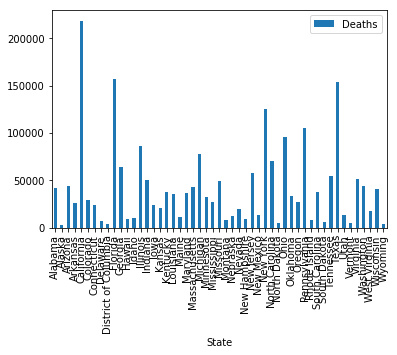

In [22]:
death_gb_state_data.plot(kind='bar', x='State', y='Deaths', subplots=False)
plt.show()

In [23]:
death_gb_cause_data = death_data_NAC_noUS.groupby(by=['Year', '113 Cause Name']).sum().reset_index()

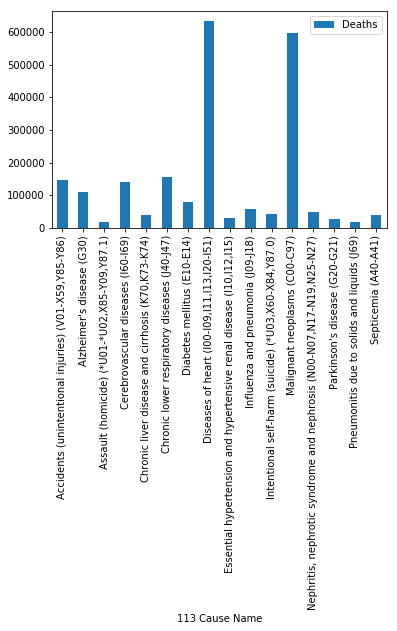

In [24]:
death_gb_cause_data.plot(kind='bar', x='113 Cause Name', y='Deaths')
plt.show()

In [25]:
death_dia_data = death_data_NAC_noUS[death_data_NAC_noUS['Cause Name'].str.contains('Dia')]

In [26]:
death_heart_data = death_data_NAC_noUS[death_data_NAC_noUS['Cause Name'].str.contains('Heart')]

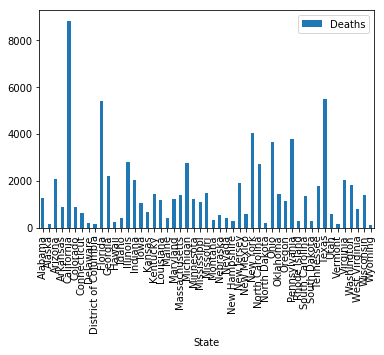

In [27]:
death_dia_data.plot(kind='bar', x='State', y='Deaths')
plt.show()

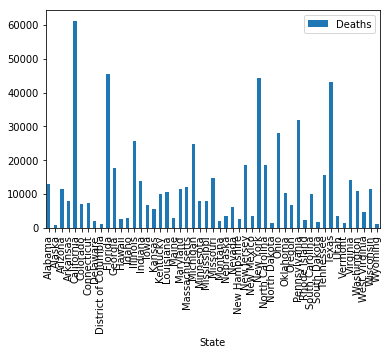

In [28]:
death_heart_data.plot(kind='bar', x='State', y='Deaths')
plt.show()

# Observations
***

4 of the 5 best performing schools spend the least per student. This is counter intuitive as most would think that spending more per student would mean that performance would be best.

All five of the top performing schools are charter school that are medium or small in size. This supports a notion that public schools don't offer the best education - leading many to select a charter school (semi-private school) vs. supporting public schools fully.

3 of the worst performing schools are large, public schools which supports the notion that parents should seek to place their child in a smaller school if possible.  Also noticed in the analysis is that these large schools often had the largest per student budget.